## Image Classification Example
### Using Functional Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

tf.__version__

'2.4.0'

In [2]:
keras.__version__

'2.4.0'

In [3]:
tf.random.set_seed(1234)

In [4]:
# Functions for loading and preprocessing the images

def load_image(img):
    img = tf.image.random_flip_left_right(img)
    return img, img

def load_dataset(split):
    train_list_ds = tf.data.Dataset.from_tensor_slices(np.load('./data/{}.npy'.format(split)))
    train_ds = train_list_ds.map(load_image)
    return train_ds

In [5]:
train_ds = load_dataset('train')
val_ds = load_dataset('val')
test_ds = load_dataset('test')

FileNotFoundError: [Errno 2] No such file or directory: './data/train.npy'

In [6]:
# Shuffle the datasets

shuffle_buffer_size = 1000
train_ds = train_ds.shuffle(shuffle_buffer_size)
val_ds = val_ds.shuffle(shuffle_buffer_size)
test_ds = test_ds.shuffle(shuffle_buffer_size)

NameError: name 'train_ds' is not defined

NameError: name 'train_ds' is not defined

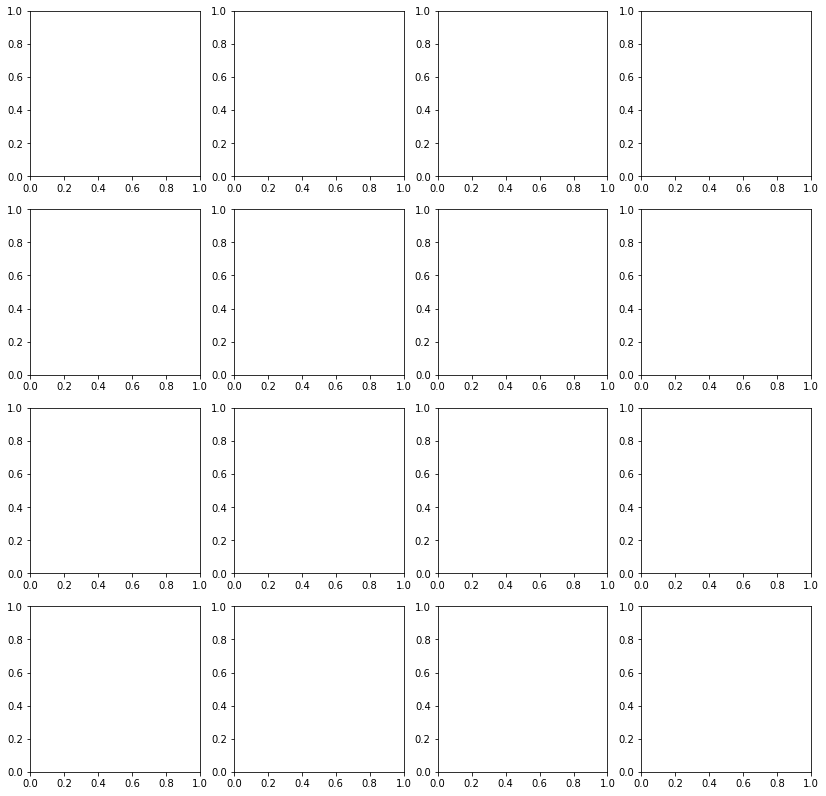

In [7]:
# Display a few examples

n_img = 4
f, axs = plt.subplots(n_img, n_img, figsize=(14, 14))

for k, image in enumerate(train_ds.take(n_img**2)):
    i = k // n_img
    j = k % n_img
    axs[i, j].imshow(image[0])
    axs[i, j].axis('off')
f.subplots_adjust(wspace=0.01, hspace=0.03)

In [23]:
input = keras.Input(shape=[32,32])
layer1 = keras.layers.Flatten(input_shape=[28, 28])(input)
layer2 = keras.layers.Dense(300, activation="relu")(layer1)
layer3 = keras.layers.Dense(100, activation="relu")(layer2)
layer4 = keras.layers.Dense(10, activation="softmax")(layer3)

model = keras.Model(inputs=[input], outputs=[layer4], name="functional")
model.summary()

Model: "functional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
